Alex Hemmerlin
Comp 435 Project 1
Data Exploration Phase
English Handwritten Characters: https://www.kaggle.com/datasets/dhruvildave/english-handwritten-characters-dataset

About the Dataset:
The dataset contains 3,410 unique images of handwritten English characters. The characters are lowercase alphabetical: a-z, uppercase alphabetical: A-Z, and numeric digits: 0-9. This results in 62 classes (26+26+10) with 55 images of each class represented in the dataset.

The csv contains two columns. The first column is the string path to the 1200x900 image. The second is the class label of the character that is represented in the image (0-9, A-Z, a-z).

In [59]:
# Comments of the format ***[DESCRIPTION]*** denote the origin of each code block

In [60]:
# Citation
# @InProceedings{deCampos09,
#   author    = "de Campos, T.~E. and Babu, B.~R. and Varma, M.",
#   title     = "Character recognition in natural images",
#   booktitle = "Proceedings of the International Conference on Computer
#   Vision Theory and Applications, Lisbon, Portugal",
#   month     = "February",
#   year      = "2009",
# }

In [61]:
# ***MY CODE***
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random
import seaborn as sns

DATASET_PATH: str = 'dataset/english.csv'               # path to the csv file
ORIGINAL_IMAGE_PATH: str = 'dataset/Img/'               # path to the Img folder containing the original images
GRAYSCALE_IMAGE_PATH: str = 'dataset/Img_grayscale/'    # path to the grayscaled images
CROPPED_IMAGE_PATH: str = 'dataset/Img_cropped/'        # path to cropped Images
RESIZED_IMAGE_PATH: str = 'dataset/Img_resized/'        # path to the compressed images

In [62]:
# ***MY CODE***
df = pd.read_csv(DATASET_PATH)
df.head()


,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0


DataFrame consists of two columns:
- The first is the path to the image
- The second is the image label

In [63]:
# ***MY CODE***

# Remove the 'Img/' from each image path because we will be converting and resaving the images to other folders later
df['image'] = df['image'].str[4:]
df.head()

,image,label
0,img001-001.png,0
1,img001-002.png,0
2,img001-003.png,0
3,img001-004.png,0
4,img001-005.png,0


In [64]:
# ***MY CODE***
df["label"].value_counts()

0    55
k    55
X    55
Y    55
Z    55
     ..
P    55
Q    55
R    55
S    55
z    55
Name: label, Length: 62, dtype: int64

All classes are equally represented, and there are no missing labels or unusual values

In [65]:
# ***CODE FROM https://www.kaggle.com/code/nourrrgfvutf/english-characters CODE BLOCK 19***

# def display_images(rows, cols, images, labels, decoder):
#     _, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(12,6))

#     for i, ax in enumerate(axes.flatten()):
#         ax.imshow(images[i], cmap='gray')
#         ax.set_xticks([])
#         ax.set_yticks([])
#         ax.set_title(f"Label: {decoder[np.where(labels[i]==1)[0][0]]}")
        
# display_images(3, 3, images, labels, decoder)

In [66]:
# ***ABOVE CODE - MODIFIED BY ME***
def display_images(rows, cols, images, labels, examples=None): # added examples so that I can plot the example number as well
    _, axes = plt.subplots(nrows = rows, ncols = cols, figsize=(12,6)) # changed to actually use the rows and cols args
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(images[i], cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        if examples is not None:
            ax.set_title(f'Label: {labels[i]}  Ex:{examples[i]}') # changed because I don't need to decode the labels
        else:
            ax.set_title(f'Label: {labels[i]}')


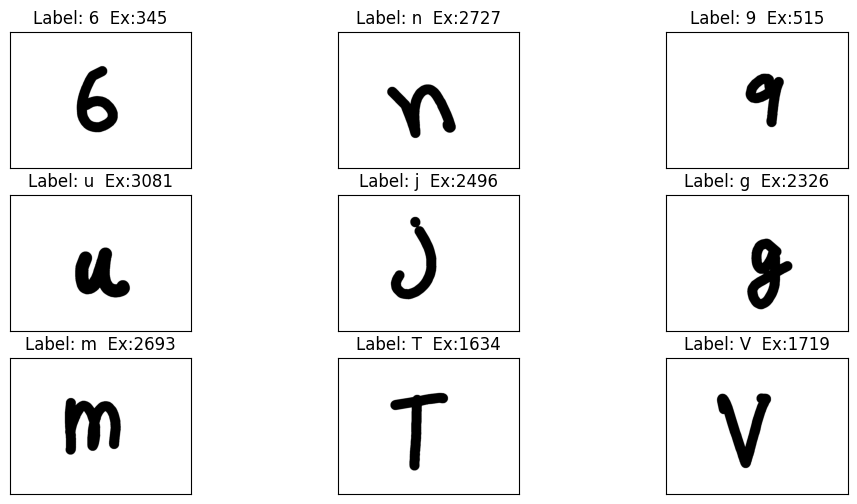

In [67]:
# ***MY CODE***
rows = 3
cols = 3
images = []
labels = []
examples = []
for _ in range(rows*cols):
    num: int = random.randint(0, 3410)
    images.append(Image.open(f'{ORIGINAL_IMAGE_PATH}{df["image"][num]}'))
    labels.append(df['label'][num])
    examples.append(num)

# Plot/Display Random examples from the dataset
display_images(rows, cols, images, labels, examples)

Interesting Examples:
- 2993 (cursive s)
- 2972 (cursive s)
- 1382 (P looks like p)
- 1041 (I looks like l) -> (capital i, but looks like lowercase L)
- 2816 (cursive p looks like h)
- 2157 (d looks like a)
- 2234 (e looks like c)
- 3409 (cursive z)
- 2969 (cursive r)

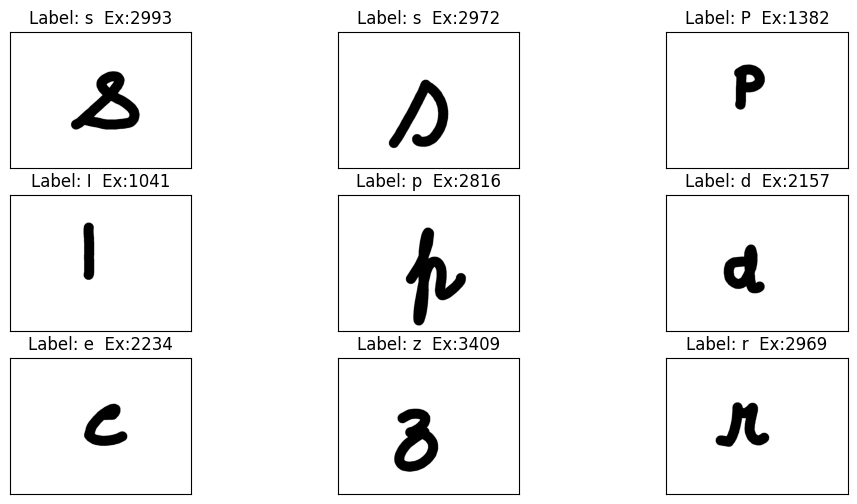

In [68]:
# ***MY CODE***
# Displays a few interesting examples that I found in the data set
interesting_examples = [2993, 2972, 1382, 1041, 2816, 2157, 2234, 3409, 2969]
display_images(3, 3, [Image.open(f'{ORIGINAL_IMAGE_PATH}{df["image"][ex]}') for ex in interesting_examples], [df['label'][ex] for ex in interesting_examples], interesting_examples)

The images are 1200x900 in size, which is far bigger than necessary. So, in order to simplify the model and improve efficiency, I will resize the images to be smaller. I will start by looking at example 2993 (displayed above), the cursive s, and I will iteratively resize until the small portion in the center of the s is lost. Then I will look at a few other examples to determine the proper dimensions to resize to.

In [69]:
# ***MY CODE***
def resize_and_plot(rows, cols, img: Image, sizes: list[tuple[int,int]]) -> None:
    """Note that len(sizes) must equal rows*cols"""
    resized = []
    for size in sizes:
        resized.append(img.resize(size))
    display_images(rows, cols, resized, sizes)

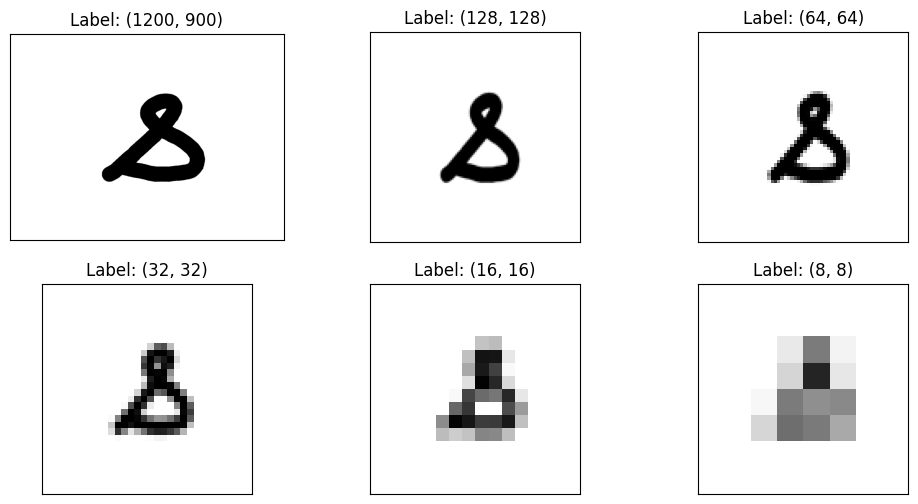

In [70]:
# ***MY CODE***
resize_and_plot(2, 3, Image.open(f'{ORIGINAL_IMAGE_PATH}{df["image"][2993]}'), [(1200,900),(128,128),(64,64),(32,32),(16,16),(8,8)])

The above plot shows the same image in 6 different sizes: the original size (1200x900), 128x128, 64x64, 32x32, 16x16, and 8x8.

From the above plot, we can see that 8 by 8 is definitely too small and it is very likely that 16 by 16 is also probably too small. 32 by 32 still allows us to kind of see the that spot in the middle at the top of the s, but it looks like there are no pure white pixels in it anymore which means that we won't be able to just use a binary feature of if the pixel is colored or not. We would have to either do additional cleaning to white out less colored pixels or include the darkness of the pixel in the model.

Resized to 64 by 64, the image is still very clear and the information loss appears to be very minimal.

However, there is a lot of surrounding white space in the image, and most of the examples seem to have a lot of whitespace around them. So, maybe by removing some of the whitespace the smaller resolutions will look even better.

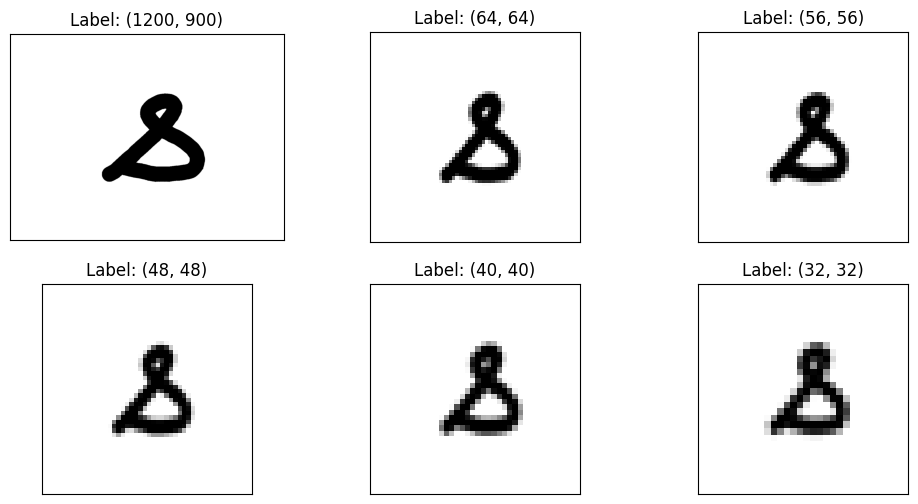

In [71]:
# ***MY CODE***
resize_and_plot(2, 3, Image.open(f'{ORIGINAL_IMAGE_PATH}{df["image"][2993]}'), [(1200,900),(64,64),(56,56),(48,48),(40,40),(32,32)])

The above plot shows the same image again in more sizes. It includes the original size, 64x64, and 32x32, but this time it also includes 3 more sizes between 64x64 and 32x32 since those seemed like the best two sizes last time.

From the above plot, we can see that the last size which shows the center of the s with a pure white pixel is the 48x48 size.

I will now view some other resized images to see if they are similarly clear at lower resolutions, particularly at 48x48 and 32x32.

Additional Examples to Test:
- 2869 (q)
- 450 (8)
- 2203 (e)
- 1216 (M)

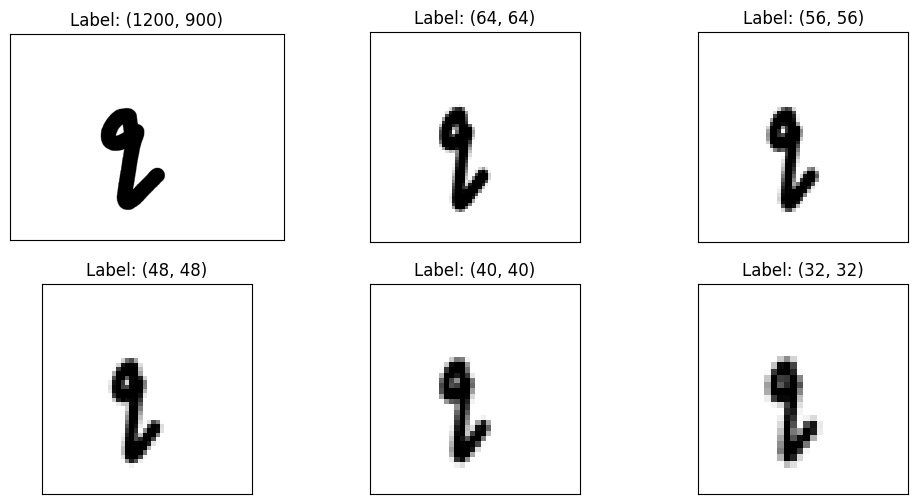

In [72]:
# ***MY CODE***
resize_and_plot(2, 3, Image.open(f'{ORIGINAL_IMAGE_PATH}{df["image"][2869]}'), [(1200,900),(64,64),(56,56),(48,48),(40,40),(32,32)])

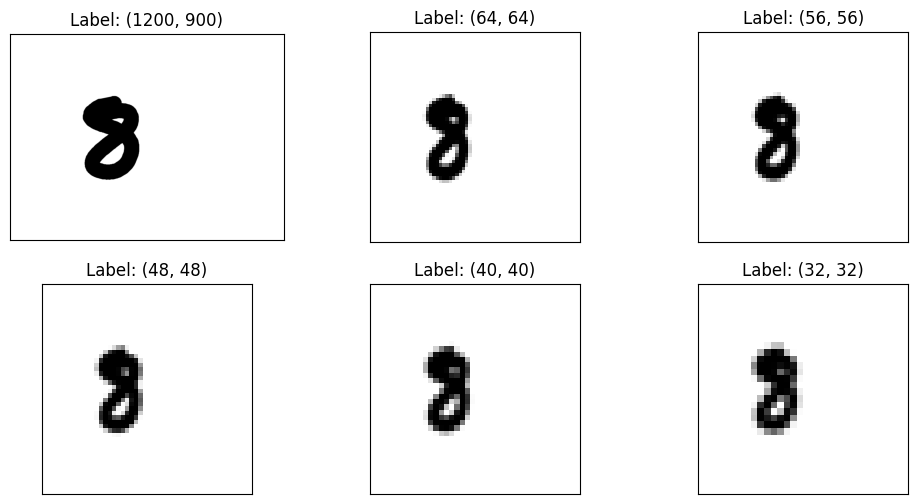

In [73]:
# ***MY CODE***
resize_and_plot(2, 3, Image.open(f'{ORIGINAL_IMAGE_PATH}{df["image"][450]}'), [(1200,900),(64,64),(56,56),(48,48),(40,40),(32,32)])

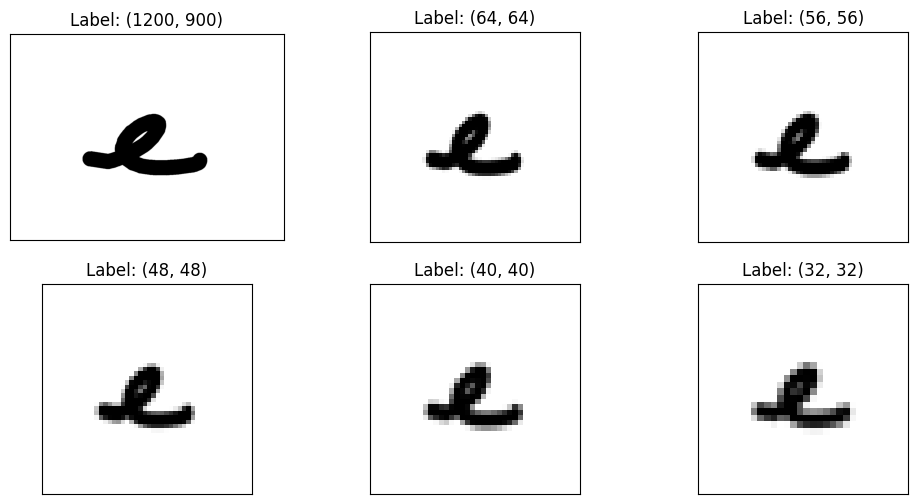

In [74]:
# ***MY CODE***
resize_and_plot(2, 3, Image.open(f'{ORIGINAL_IMAGE_PATH}{df["image"][2203]}'), [(1200,900),(64,64),(56,56),(48,48),(40,40),(32,32)])

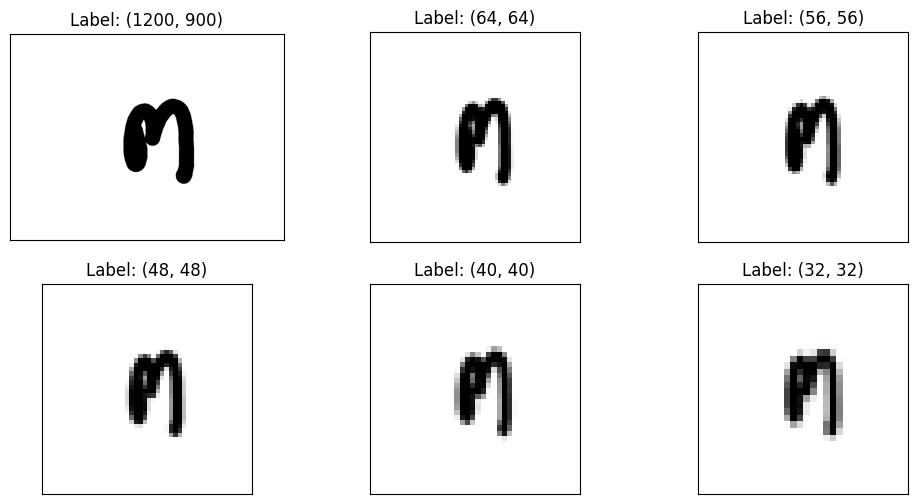

In [75]:
# ***MY CODE***
resize_and_plot(2, 3, Image.open(f'{ORIGINAL_IMAGE_PATH}{df["image"][1216]}'), [(1200,900),(64,64),(56,56),(48,48),(40,40),(32,32)])

The q looked good at 48x48 with the center still being easily found and distinguished. However, the 8, e, and M all required higher resolution to be able to still have at least one pure white pixel in their centers. The e and M still did not have a pure white pixel even at 64x64. This leads me to believe that it would probably be best to either transform some of the lightest pixels back to white at low resolution, or to incorporate the darkness of the pixel on a scale of 1-3 or 1-5 in the model. I think that either of these changes would make 48x48 and maybe 32x32 good enough for the model.

Next, I will experiment with possibly cutting whitespace off the sides of the image. The tricky part will be how much whitespace to leave on each side because we probably want to leave some. Although, cutting whitespace and then resizing the image smaller could remove the whitespace if not enough was left on the edges. I will try this with the lowercase Q example from above and I will also try it with a capital W example because capital W is one of the widest characters in the dataset, so it will benefit the least from the whitespace removal. However, even though it will benefit the least from the removal, I believe that capital W is already pretty distinguishable and lacks the sort of features the cutting of whitespace attempts to solve, for example small sections of whitespace in the center of the letter like q and e have or tightly packed details like k might have.

In [76]:
# ***MY CODE***
img = Image.open(f'{ORIGINAL_IMAGE_PATH}{df["image"][2869]}')
pixel_vals = list(img.getdata())
print(len(pixel_vals))
print(pixel_vals[0])
for val in pixel_vals:
    if val != (255,255,255) and val != (0,0,0):
        print(val)
        break

1080000
(255, 255, 255)


Interestingly, even thought the image is black and white, the pixel data is still stored as an rgb tuple. This means that each pixel stores 3 numbers even though 1 would work. Since grayscale images are all that we need, I will convert the images to grayscale in order to reduce unnecessary complexity.

In [77]:
# *** MY CODE ***
def convert_to_grayscale() -> None:
    for img in df['image']:
        Image.open(f'{ORIGINAL_IMAGE_PATH}{img}').convert('L').save(f'{GRAYSCALE_IMAGE_PATH}{img}')

# NOTE: Grayscaled images stored at dataset/Img_grayscale
# NOTE: This code takes about 2 minutes to run

#convert_to_grayscale()

My process to cut the whitespace off the images will be to find the top most, left most, right most, and bottom most colored pixel (pixel value != 255). This gives a box around the character, that box can be extended by a certain number of pixels (to include some whitespace around the edges), and then that new box can be saved as its own image to be resized later.

Assuming the images will be resized to 32x32 later, I believe that I want to keep at least 28 pixels in the original image size around the edges to make sure at least one pixel in the resized image is whitespace.

900 / 32 = 28

However, if this ends up improving the quality by a substantial amount, then it might be feasible to resize the images even smaller, in which case the border may have to be adjusted.

In [78]:
# ***MY CODE***
def crop_image(img: Image, border: int) -> tuple[Image, tuple[int,int]]:
    """ DEPRECATED -> USE CROP_IMAGE_SQUARE TO KEEP THE ASPECT RATIO
        Takes an img and an integer number of whitespace pixels to save on the edges
        returns the cropped Image and the new size
    """
    pixels: list[int] = list(img.getdata())
    width: int = img.size[0]
    first: bool = True
    top: int = 0
    bottom: int = 0
    left: int = 0
    right: int = 0
    left_most_col: int = width
    right_most_col: int = 0
    for i in range(len(pixels)):
        if pixels[i] != 255:
            if first:
                first = False
                top = i
            if i % width < left_most_col:
                left_most_col = i % width
                left = i
            if i % width > right_most_col: 
                right_most_col = i % width
                right = i
            bottom = i

    if ((top // width)-border) > 0: top_row = ((top // width)-border)
    else: top_row = 0
    if ((left % width)-border) > 0: left_col = ((left % width)-border)
    else: left_col = 0
    if ((right % width)+border) < (len(pixels)-1) % width: right_col = ((right % width)+border)
    else: right_col = (len(pixels)-1) % width
    if ((bottom // width)+border) < (len(pixels)-1) // width: bottom_row = ((bottom // width)+border)
    else: bottom_row = (len(pixels)-1) // width

    top_left = (top_row*width) + left_col
    bottom_right = (bottom_row*width) + right_col

    new_img_pixels: list[int] = []
    for i in range(top_left, bottom_right):
        if (i % width >= left_col) and (i % width <= right_col):
            new_img_pixels.append(pixels[i])

    new_img = Image.new('L', ((right_col-left_col+1),(bottom_row-top_row+1)))
    new_img.putdata(new_img_pixels)
    return (new_img, ((right_col-left_col+1),(bottom_row-top_row+1)))

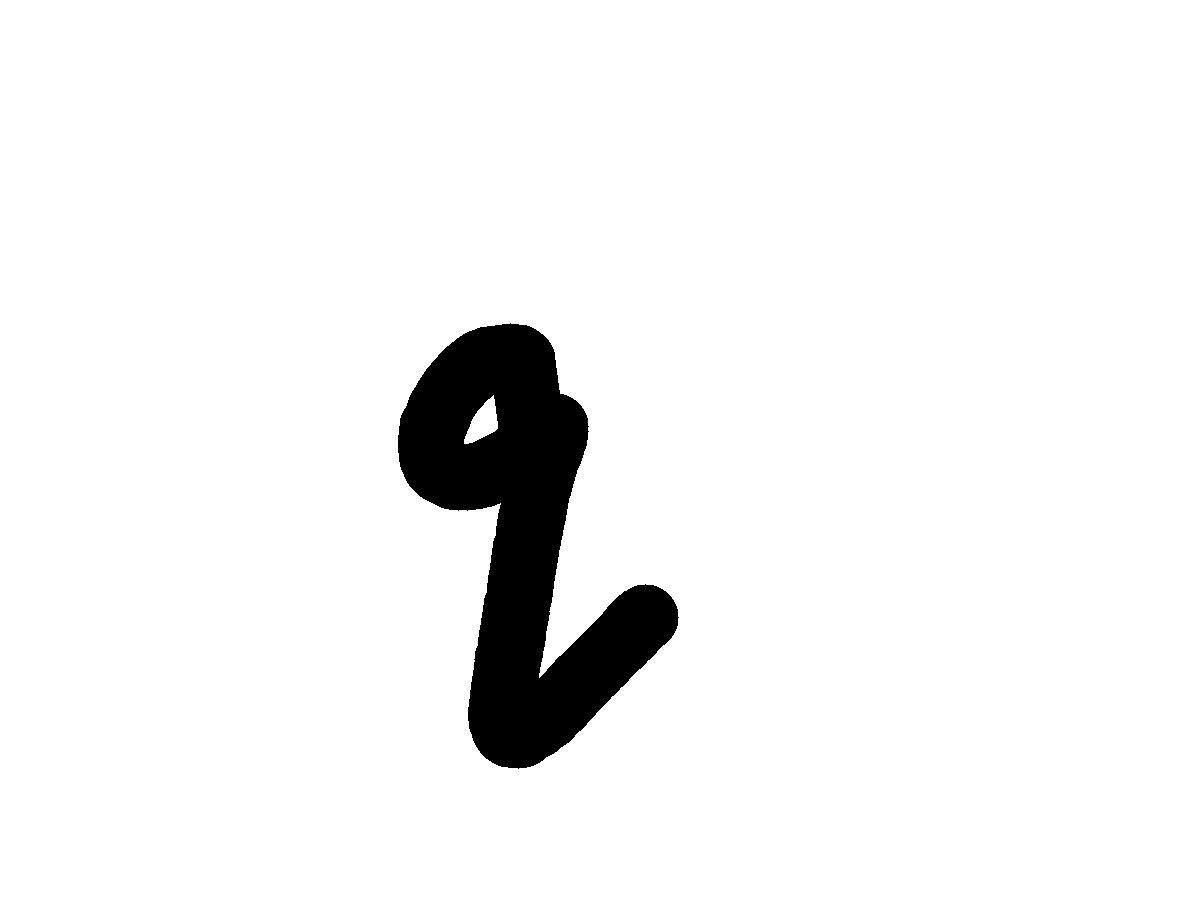

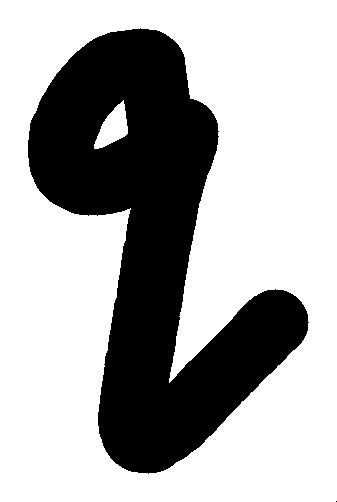

In [79]:
# ***MY CODE***
img1 = Image.open(f'{GRAYSCALE_IMAGE_PATH}{df["image"][2869]}')
display(img1)
img2, img2_size = crop_image(img1, 28)
display(img2)

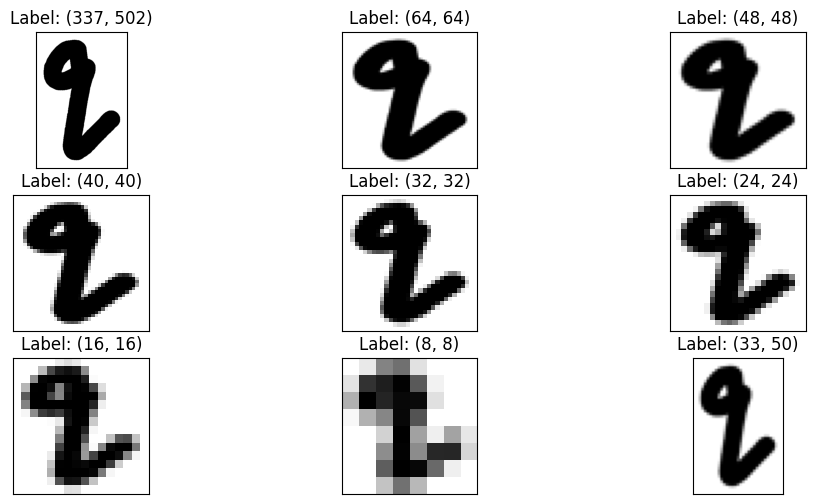

In [80]:
resize_and_plot(3,3,img2,[img2_size,(64,64),(48,48),(40,40),(32,32),(24,24),(16,16),(8,8),(img2_size[0]//10,img2_size[1]//10)])

The above plot shows the new whitespace cut image resized. The first image is the original size of the image after the whitespace removal. As we can see, the whitespace removal did improve the quality of the image after the resizing since more pixels can now be used for the character.

After running this experiment, I also realized that resizing the images to 32x32 or some other square shape squashes the images a bit because of the change in aspect ratio. I'm not sure if this is something that I need to worry about or not. It is possible that the squashing could make some features harder to pick out. To see the squashing effect, I also plotted the image scaled down by a factor of 10 (33x50 above). This keeps the ratio of width to height about the same, and as seen above does seem to increase the image quality.

However, for the model I want all of the images to be the same size eventually, so I won't be able to just scale them down proportionally to themselves. It is possible that I could experiment with scaling on all of the characters and sort of average the dimensions on those to get the final resize dimensions, but I don't think that would go all to well given that there are characters that are wider than they are tall and vice versa. I believe that would mess up the scaling and result in a square ish shape anyway. So, I will not be experimenting with that though it could potentially be interesting.

Another detail of note is that the whitespace cutting also has the added benefit of centering the character in the image. This may be useful for future synthetic features such as proportion of top to bottom colored pixels.

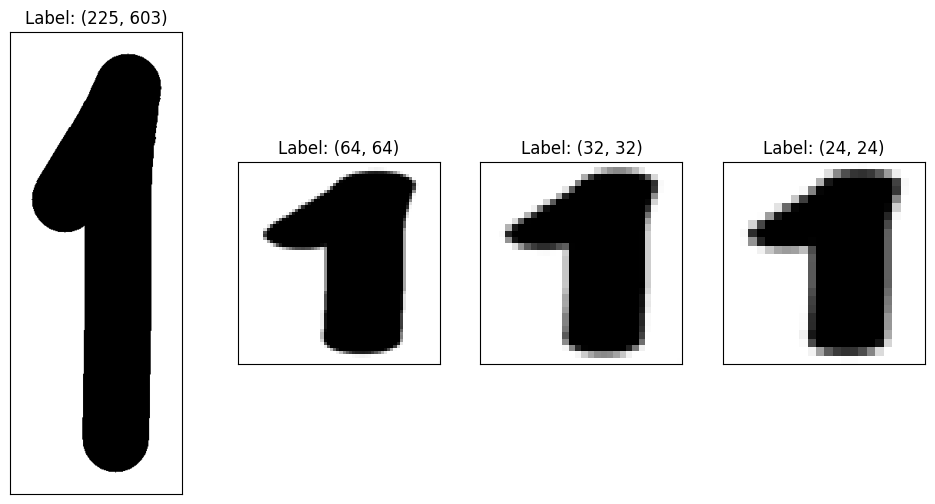

In [81]:
img = Image.open(f'{GRAYSCALE_IMAGE_PATH}{df["image"][56]}')
img, size = crop_image(img, 28)

resize_and_plot(1,4,img,[size, (64,64), (32,32), (24,24)])

After cropping a few more images, I see that certain characters get cropped to be much taller than they are wide such as 1 and lowercase L (and there are possibly others that would be cropped to be much wider than tall). This exagerates the squashing of the character when resized to a square aspect ratio. So I will refactor my crop_image to keep the images square when cropping so that when they are resized they don't get squashed.

In [82]:
# ***MY CODE***
# REFACTORED TO SQUARE THE IMAGES (mostly)
def crop_image_square(img: Image, border: int) -> tuple[Image, tuple[int,int]]:
    """
        Takes an img and an integer number of whitespace pixels to save on the edges
        returns the cropped Image and the new size
    """
    pixels: list[int] = list(img.getdata())
    width: int = img.size[0]
    first: bool = True
    top: int = 0
    bottom: int = 0
    left: int = 0
    right: int = 0
    left_most_col: int = width
    right_most_col: int = 0
    for i in range(len(pixels)):
        if pixels[i] != 255:
            if first:
                first = False
                top = i
            if i % width < left_most_col:
                left_most_col = i % width
                left = i
            if i % width > right_most_col: 
                right_most_col = i % width
                right = i
            bottom = i

    if ((top // width)-border) > 0: top_row = ((top // width)-border)
    else: top_row = 0
    if ((left % width)-border) > 0: left_col = ((left % width)-border)
    else: left_col = 0
    if ((right % width)+border) < (len(pixels)-1) % width: right_col = ((right % width)+border)
    else: right_col = (len(pixels)-1) % width
    if ((bottom // width)+border) < (len(pixels)-1) // width: bottom_row = ((bottom // width)+border)
    else: bottom_row = (len(pixels)-1) // width

    # Make sure to keep the images relatively square
    if bottom_row-top_row > right_col-left_col:
        # Taller than wide
        dif = ((bottom_row-top_row)-(right_col-left_col))//2
        if right_col + dif <= (len(pixels)-1) % width: right_col += dif
        else: right_col = (len(pixels)-1) % width
        if left_col - dif >= 0: left_col -= dif
        else: left_col = 0
    else:
        # Wider than tall
        dif = ((right_col-left_col)-(bottom_row-top_row))//2
        if top_row - dif >= 0: top_row -= dif
        else: top_row = 0
        if bottom_row + dif <= (len(pixels)-1) // width: bottom_row += dif
        else: bottom_row = (len(pixels)-1) // width

    top_left = (top_row*width) + left_col
    bottom_right = (bottom_row*width) + right_col

    new_img_pixels: list[int] = []
    for i in range(top_left, bottom_right):
        if (i % width >= left_col) and (i % width <= right_col):
            new_img_pixels.append(pixels[i])

    new_img = Image.new('L', ((right_col-left_col+1),(bottom_row-top_row+1)))
    new_img.putdata(new_img_pixels)
    return (new_img, ((right_col-left_col+1),(bottom_row-top_row+1)))

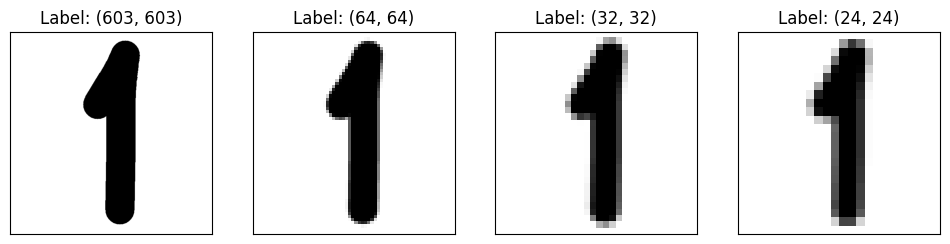

In [83]:
img = Image.open(f'{GRAYSCALE_IMAGE_PATH}{df["image"][56]}')
img, size = crop_image_square(img, 28)

resize_and_plot(1,4,img,[size, (64,64), (32,32), (24,24)])

As shown in the above plots, the squaring of the image during cropping eliminates the squashing when the image is resized.

There is a chance that if the character is close to an edge that it won't be fully squared. I don't think this will be an issue so I won't deal with it right now, but I will check for images that this happens to.

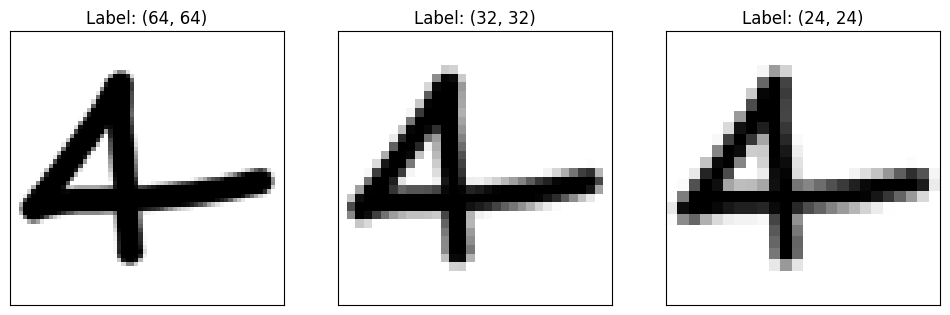

In [84]:
# ***MY CODE***
# Wide image example
img = Image.open(f'./dataset/Img_grayscale/img005-041.png')
img, size = crop_image_square(img, 28)
resize_and_plot(1,3,img,[(64,64),(32,32),(24,24)])

In [85]:
# *MY CODE***
# removes extra whitespace from all images
def crop_all(border: int) -> None:
    for img in df['image']:
        new_img, size = crop_image_square(Image.open(f'{GRAYSCALE_IMAGE_PATH}{img}'),border)
        if abs(size[0]-size[1]) > 50:
            print(f'Image: {img} cropped to {size}')
        new_img.save(f'{CROPPED_IMAGE_PATH}{img}')

# Crops the images in a square shape leaving at least 28 pixels of whitespace around the character
# NOTE: Cropped images stored at dataset/Img_cropped/
# NOTE: This code takes about 8 minutes to run

#crop_all(28)

The only image in the entire dataset where the cropping did not leave the height and width within 50 pixels was /img049-001.png as found above (When run, the above code prints out all the images where the resulting height and width differs by more than 50 pixels). This image was cropped to 619x556. It is plotted below.

Seeing that this is the least square image in the dataset, and that it is still pretty square and looks good when resized, I conclude that it will be okay to crop all of the images this way and then resize them into a square aspect ratio.

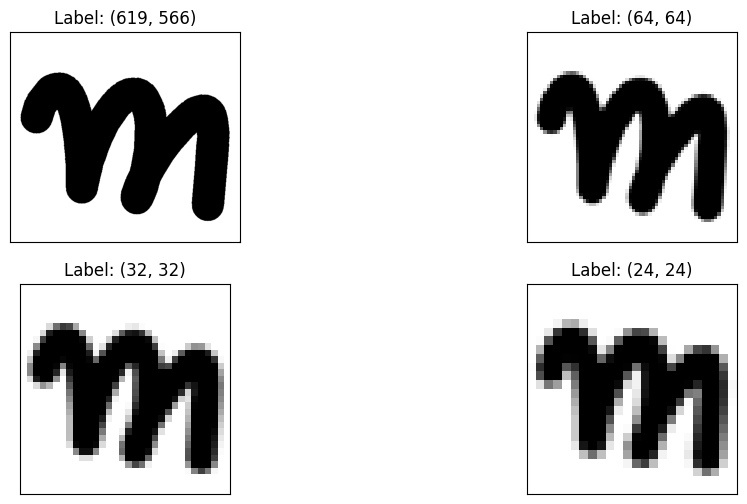

In [86]:
# ***MY CODE***
img = Image.open('./dataset/Img_cropped/img049-001.png')
resize_and_plot(2,2,img,[img.size,(64,64),(32,32),(24,24)])

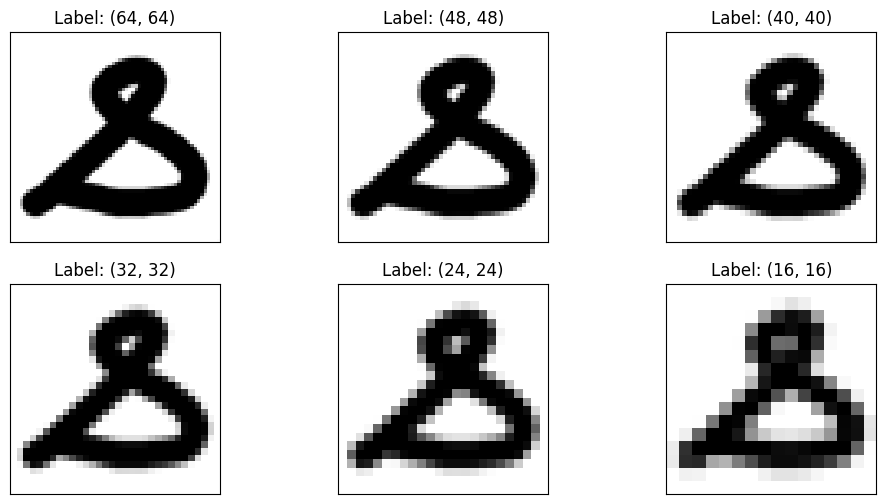

In [87]:
img = Image.open(f'{CROPPED_IMAGE_PATH}{df["image"][2993]}')
resize_and_plot(2,3,img,[(64,64),(48,48),(40,40),(32,32),(24,24),(16,16)])

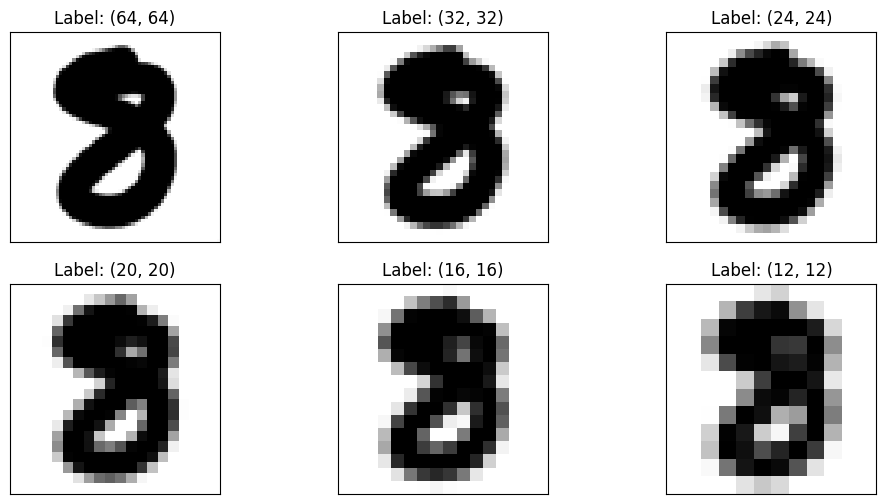

In [88]:
resize_and_plot(2,3,Image.open(f'{CROPPED_IMAGE_PATH}{df["image"][450]}'),[(64,64),(32,32),(24,24),(20,20),(16,16),(12,12)])

From my experiments and testing, 24x24 seems like it is close to about the smallest compression that does not have much information loss. Therefore, I will resize all of the cropped images to be 24x24.

In [89]:
# ***MY CODE***
def resize_all_images(size: tuple[int, int]) -> None:
    for img in df['image']:
        Image.open(f'{CROPPED_IMAGE_PATH}{img}').resize(size).save(f'{RESIZED_IMAGE_PATH}{img}')

# resizing all the images takes about 30 seconds

#resize_all_images((24,24))

Next I will look to see if there is a relationship with coverage (amount of the space tht is colored) and the label (which character it is).

Coverage will be calculated by counting the number of non-whte pixels and dividing it by the total number of pixels.

In [90]:
# ***MY CODE***
def coverage(img: Image) -> float:
    pixels = list(img.getdata())
    colored = 0
    for pixel in pixels:
        if pixel != 255:
            colored += 1
    return colored/len(pixels)

In [91]:
# Copy the df
feature_df = df.copy()

In [92]:
# ***MY CODE***
# computes the coverage of each image after cropping and adds it to the feature_df
feature_df['cropped_coverage'] = [coverage(Image.open(f'{RESIZED_IMAGE_PATH}{img}')) for img in df['image']]
feature_df.head()

,image,label,cropped_coverage
0,img001-001.png,0,0.387153
1,img001-002.png,0,0.432292
2,img001-003.png,0,0.333333
3,img001-004.png,0,0.444444
4,img001-005.png,0,0.500000


In [93]:
# ***MY CODE***
cropped_coverage_df = feature_df.drop('image', axis=1).groupby('label').mean().reset_index().sort_values('cropped_coverage')
cropped_coverage_df.head()

,label,cropped_coverage
44,i,0.217519
45,j,0.218277
1,1,0.220865
47,l,0.238699
18,I,0.241225


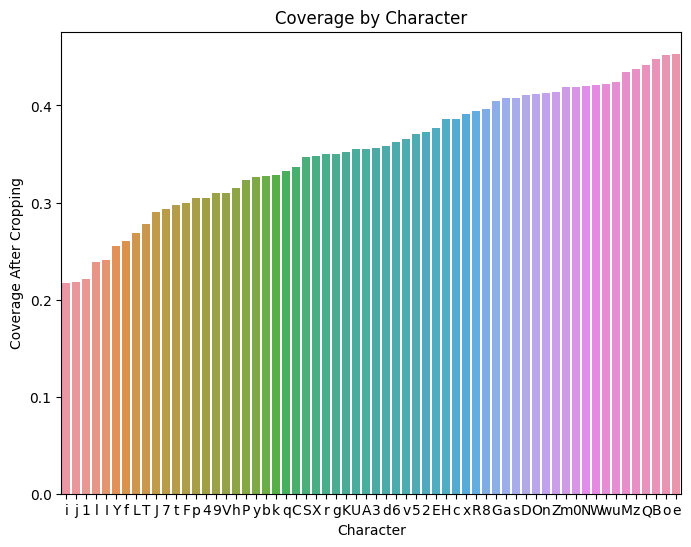

In [94]:
# ***THIS CODE WAS GENERATED BY AI AND USED WITH MINIMAL MODIFICATION***
plt.figure(figsize=(8, 6))
sns.barplot(x='label', y='cropped_coverage', data=cropped_coverage_df)
plt.title('Coverage by Character')
plt.xlabel('Character')
plt.ylabel('Coverage After Cropping')
plt.show()

The above plot shows the average coverage by character (sorted from low to high). There are definitely some characters that have significantly different coverages which means that this could be a potentially useful synthetic feature.

Looking at the plot, none of the differences really jump out as particularly interesting. In general, letters that look alike have similar coverage (as expected), so I don't anticipate it being very helpful at differentiating similar letters.

There is also a possibility that cropping the images has reduced the differences in coverage, since the crop aims to reduce the extra whitespace. A possible solution to this is to include the before cropped whitespace as well as the after cropped whitespace.

In [95]:
# ***MY CODE***
# computes the coverage of each image before cropping and adds it to the feature_df
# NOTE: this takes between 2-4 minutes
feature_df['original_coverage'] = [coverage(Image.open(f'{GRAYSCALE_IMAGE_PATH}{img}')) for img in df['image']]
feature_df.head()

,image,label,cropped_coverage,original_coverage
0,img001-001.png,0,0.387153,0.105967
1,img001-002.png,0,0.432292,0.088702
2,img001-003.png,0,0.333333,0.113457
3,img001-004.png,0,0.444444,0.043428
4,img001-005.png,0,0.500000,0.052165


In [96]:
# ***MY CODE***
original_coverage_df = feature_df.drop('image', axis=1).groupby('label').mean().reset_index().sort_values('original_coverage')
original_coverage_df.head()

,label,cropped_coverage,original_coverage
44,i,0.217519,0.030125
1,1,0.220865,0.034449
38,c,0.386080,0.036695
57,v,0.365215,0.038694
53,r,0.349747,0.039696


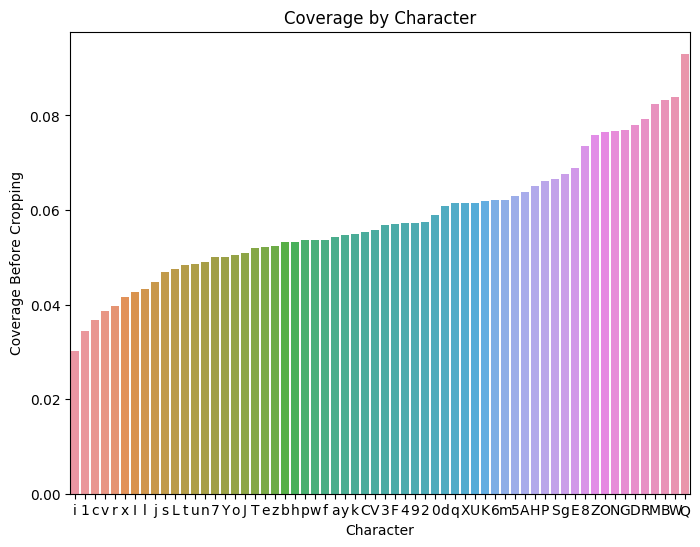

In [97]:
# ***THIS CODE WAS GENERATED BY AI AND USED WITH MINIMAL MODIFICATION***
plt.figure(figsize=(8, 6))
sns.barplot(x='label', y='original_coverage', data=original_coverage_df)
plt.title('Coverage by Character')
plt.xlabel('Character')
plt.ylabel('Coverage Before Cropping')
plt.show()

As expected, the coverage of the characters before cropping varies more than the coverage of the characters after cropping.

It is also important to consider that the overall coverage is much lower on all of the characters before cropping. This is because the cropping removes a lot of extra witespace, thus making the character take up more of the available space.

In this plot, most of the highest coverage characters are the capital letters which makes sense because capital letters tend to be drawn bigger. The numbers are also typically towards the larger end, but they are less distinctive.

Another interesting thing that I noticed is the change in coverage from before to after cropped. Certain characters, e and o especially for example, dramatically changed their positions from before to after. Before cropping they are towards the lower end and after cropping they are the two highest.

So, another potential feature would be to take the before and after ratio of coverage. This might tell the model something about the compactness or density of the character. Basically, is most of the writing for the character all in one small spot, or is it more spread out.

In [98]:
feature_df['coverage_ratio'] = feature_df['cropped_coverage'] / feature_df['original_coverage']
coverage_ratio_df = feature_df.drop('image', axis=1).groupby('label').mean().reset_index().sort_values('coverage_ratio')
coverage_ratio_df.head()

,label,cropped_coverage,original_coverage,coverage_ratio
26,Q,0.441761,0.093057,5.069111
25,P,0.323295,0.066057,5.219299
45,j,0.218277,0.044753,5.283892
27,R,0.394665,0.079333,5.298458
41,f,0.260732,0.053752,5.315634


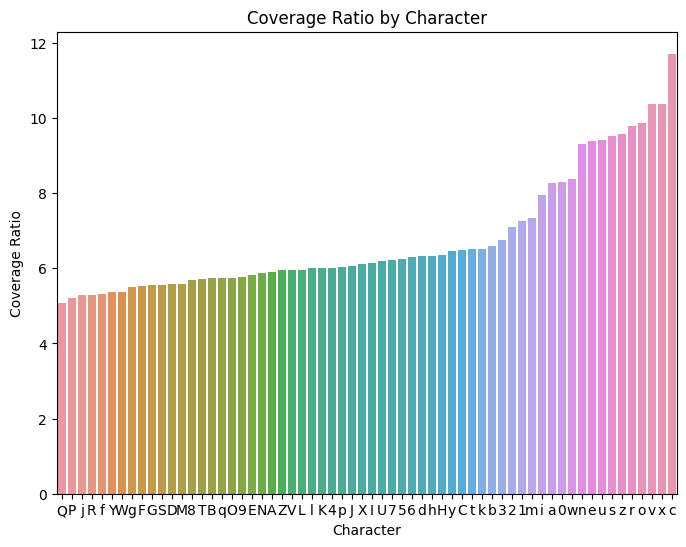

In [99]:
# ***THIS CODE WAS GENERATED BY AI AND USED WITH MINIMAL MODIFICATION***
plt.figure(figsize=(8, 6))
sns.barplot(x='label', y='coverage_ratio', data=coverage_ratio_df)
plt.title('Coverage Ratio by Character')
plt.xlabel('Character')
plt.ylabel('Coverage Ratio')
plt.show()

The above plot shows the ratio of coverage after cropping to the coverage before cropping. Interestingly, there seems to be a group of particular letters that are quite different from the rest. From n to the right, all of these characters have much higher after coverage than before coverage. It makes sense that these characters would be here as well. They are all small characters that can be cropped on every side in a square shape without leaving a lot of extra whitespace.

I am actually very surprised that c is the character with the largest ratio on average (by quite a lot too). I would have expected e to beat it easily, and maybe x or s as well.

This feature may be more useful than the other two features alone becuase it captures something more significant than the other two. An example of where this might be especially helpful is classifying i and j. These two characters are pretty similar, and they are pretty close on the first two plots (coverage before and coverage after), but they are very far apart on the ratio of coverage. This makes sense because it takes more writing to make a j and j's are more stretched out while i's are generally more compact.

Another area where this might be helpful is correctly classifying the letters that look the same in capital versus lowercase just different size such as c/C and x/X. The lowercase versions of these letters are smaller and more compact and therefore have a higher ratio of coverage than their capital counterparts.

Next I will look at characters height to width ratio.

In [100]:
# ***MY CODE***
def height_and_width(img: Image, ratio: bool = False):
    """Returns the height and width of a character in an image in pixels
       If ratio is True, returns the height/width instead
    """
    pixels: list[int] = list(img.getdata())
    width = img.size[0]

    # Copied from crop function to find the character boundries
    first: bool = True
    top: int = 0
    bottom: int = 0
    left: int = 0
    right: int = 0
    left_most_col: int = width
    right_most_col: int = 0
    for i in range(len(pixels)):
        if pixels[i] != 255:
            if first:
                first = False
                top = i
            if i % width < left_most_col:
                left_most_col = i % width
                left = i
            if i % width > right_most_col: 
                right_most_col = i % width
                right = i
            bottom = i

    top_row = top // width
    left_col = left % width
    right_col = right % width
    bottom_row = bottom // width

    if ratio:
        return (bottom_row-top_row)/(right_col-left_col)
    return (bottom_row-top_row),(right_col-left_col)

In [101]:
# ***MY CODE***
# NOTE: This code takes between 2-4 minutes
feature_df['resized_height_to_width'] = [height_and_width(Image.open(f'{RESIZED_IMAGE_PATH}{img}'),True) for img in df['image']]
feature_df['original_height_to_width'] = [height_and_width(Image.open(f'{GRAYSCALE_IMAGE_PATH}{img}'),True) for img in df['image']]
feature_df.head()

,image,label,cropped_coverage,original_coverage,coverage_ratio,resized_height_to_width,original_height_to_width
0,img001-001.png,0,0.387153,0.105967,3.653534,1.533333,1.426829
1,img001-002.png,0,0.432292,0.088702,4.873536,1.235294,1.318182
2,img001-003.png,0,0.333333,0.113457,2.937960,1.352941,1.367347
3,img001-004.png,0,0.444444,0.043428,10.234105,1.235294,1.200000
4,img001-005.png,0,0.500000,0.052165,9.585005,1.000000,1.008982


In [102]:
# ***MY CODE***
feature_df['height_to_width_change'] =  feature_df['original_height_to_width'] / feature_df['resized_height_to_width']
feature_df.head()

,image,label,cropped_coverage,original_coverage,coverage_ratio,resized_height_to_width,original_height_to_width,height_to_width_change
0,img001-001.png,0,0.387153,0.105967,3.653534,1.533333,1.426829,0.930541
1,img001-002.png,0,0.432292,0.088702,4.873536,1.235294,1.318182,1.067100
2,img001-003.png,0,0.333333,0.113457,2.937960,1.352941,1.367347,1.010648
3,img001-004.png,0,0.444444,0.043428,10.234105,1.235294,1.200000,0.971429
4,img001-005.png,0,0.500000,0.052165,9.585005,1.000000,1.008982,1.008982


In [103]:
# ***MY CODE***
resized_height_to_width_df = feature_df.drop('image', axis=1).groupby('label').mean().reset_index().sort_values('resized_height_to_width')
original_height_to_width_df = feature_df.drop('image', axis=1).groupby('label').mean().reset_index().sort_values('original_height_to_width')
height_to_width_change_df = feature_df.drop('image', axis=1).groupby('label').mean().reset_index().sort_values('height_to_width_change')

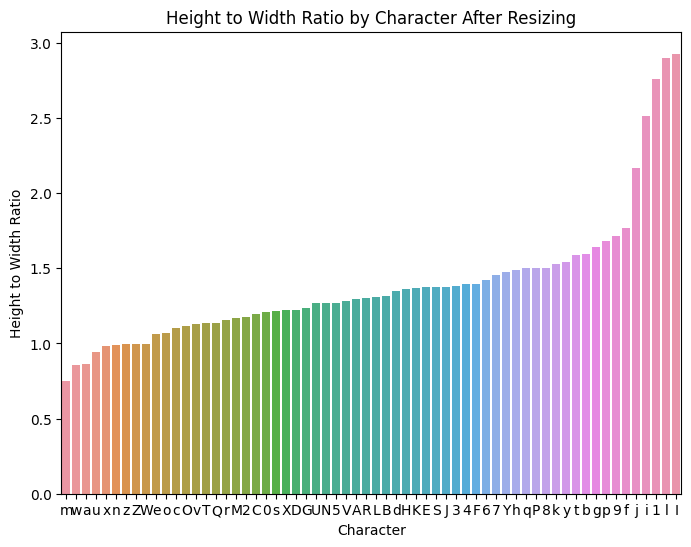

In [104]:
# ***THIS CODE WAS GENERATED BY AI AND USED WITH MINIMAL MODIFICATION***
plt.figure(figsize=(8, 6))
sns.barplot(x='label', y='resized_height_to_width', data=resized_height_to_width_df)
plt.title('Height to Width Ratio by Character After Resizing')
plt.xlabel('Character')
plt.ylabel('Height to Width Ratio')
plt.show()

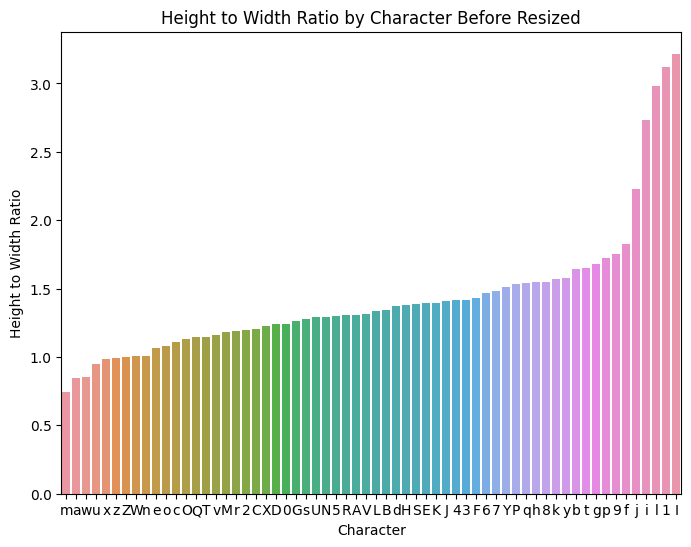

In [105]:
# ***THIS CODE WAS GENERATED BY AI AND USED WITH MINIMAL MODIFICATION***
plt.figure(figsize=(8, 6))
sns.barplot(x='label', y='original_height_to_width', data=original_height_to_width_df)
plt.title('Height to Width Ratio by Character Before Resized')
plt.xlabel('Character')
plt.ylabel('Height to Width Ratio')
plt.show()

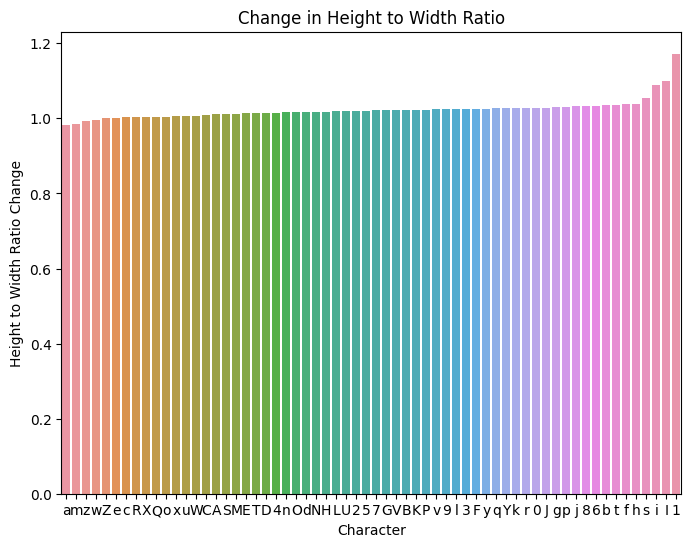

In [106]:
# ***THIS CODE WAS GENERATED BY AI AND USED WITH MINIMAL MODIFICATION***
plt.figure(figsize=(8, 6))
sns.barplot(x='label', y='height_to_width_change', data=height_to_width_change_df)
plt.title('Change in Height to Width Ratio')
plt.xlabel('Character')
plt.ylabel('Height to Width Ratio Change')
plt.show()

The above plots show the average ratio of height to width of each character. The first shows the ratio after the character has been resized, the second shows before resizing, and the third shows the ratio between before resized to after resized.

After viewing these plots it should have been obvious that the ratio of height to width from before to after resizing would not change at all for any character since I (mostly) retain the aspect ratio when I crop the images. This means that the model will only benefit from one of the height to width ratios, so if I decide to include this feature in the model I will only include the height to width ratio after resizing the image.

Even though it is true that the height to width ratio will be slightly less accurate using the resized images, since the resizing lowers the resolution of the image, it is much quicker to calculate the resized image height to width ratio. This is because the resized images are 24x24 in size and the original images are 1200x900.

The height to width ratios of the characters are pretty much what I expected them to be. Characters like l, 1, I, i, and j are at the top because these characters tend to be drawn tall and skinny, while characters such as m and w are obviously much wider than they are tall.

I am a bit surprised that most characters tend to be taller than they are wide. I never really thought about it before, but from the plots it is pretty clear. Characters with a height to width ratio around 1.0 (such as u, x, n, and z) are actually pretty close to the bottom.

This height to width ratio may not be extremely useful because it does have to do a lot with how the characters look. So, characters that are already hard to distinguish becuase they look alike aren't going to benefit much from this feature. Characters that look alike probably also have similar proportions height and width wise.

One example where this might be useful is differentiating between lowercase j or i and capital J. These letters look pretty similar, but since most people draw capital J with the crossbar on top and a more exaggerated hook on the bottom, it tends to be quite a bit wider than lowercase j and i. However, if the model can pick up on whether or not there is a dot in the image, using the height and width in this case will probably be unnecessary.